## Decision Tree Algorithim

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Reading the data

In [2]:
df = pd.read_csv('titanic.csv') # load the dataset using pandas

In [3]:
df.head(5) # inspect the top five row of the data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape # checks the numbe rof rows and column

(891, 12)

This dataset contain **891** rows and **12** columns

In [5]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning The data

In [6]:
df.isnull().sum()  # check the number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age and cabin contains 177 and 687 null values respectively

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mode()) # replace the null values of age columns with the mean

<AxesSubplot:xlabel='Age', ylabel='Count'>

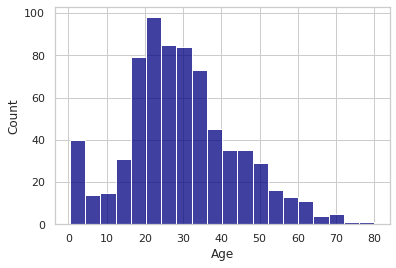

In [8]:
sns.histplot(data=df, x='Age', color= 'navy')

In [9]:
df = df.drop('Cabin', axis=1)

In [10]:
df.duplicated().sum() #xhecks for number of duplicated columns

0

No duplicated value in the dataset

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


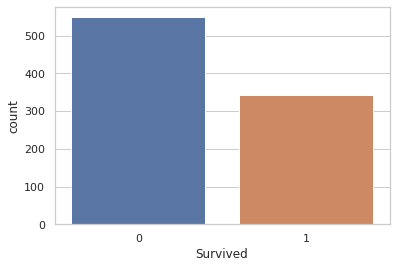

In [12]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df) # visulalise the distribution of target column 
plt.show()

From the dataset 342 suvivied 

In [13]:
df= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'], axis=1)

In [14]:
df.groupby(by='Survived').mean()

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.626179,22.117887
1,1.950292,28.343690,48.395408


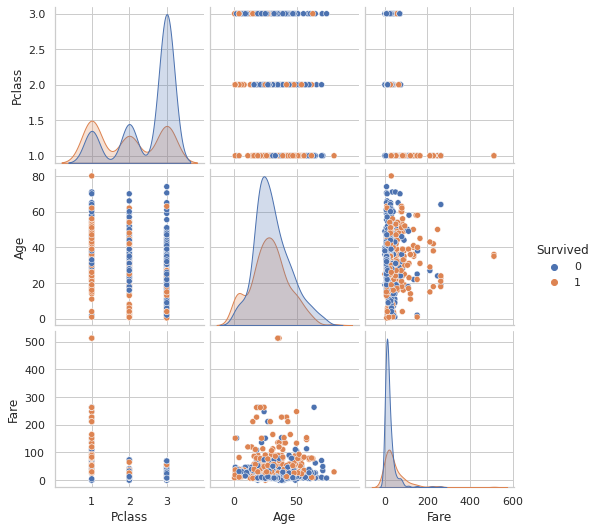

In [15]:
sns.pairplot(df, hue = "Survived")

some outliers in the Fare columns

In [16]:
x=df[df['Fare'] > 300].index #droping rows with the outliers
df=df.drop(x, axis=0)

In [17]:
df['Fare'] = pd.cut(x=df['Fare'], bins=[0, 50, 100, 150, 200, 250, 300],
                    labels=['1 to 50', '51 to 100', '101 to 150',
                            '151 to 200', '201 to 250', '250 to 300'])

1 to 50       716
51 to 100     107
101 to 150     24
201 to 250     11
151 to 200      9
250 to 300      6
Name: Fare, dtype: int64


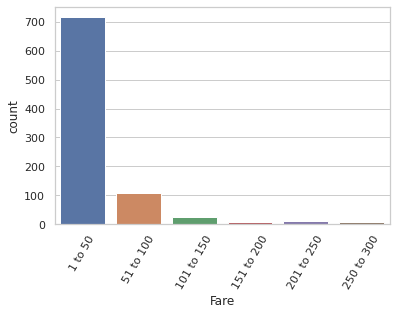

In [18]:
print(df['Fare'].value_counts())
sns.countplot(x='Fare', data=df) # visulalise the distribution of target column 
plt.xticks(rotation=60)
plt.show()


In [19]:
df['Age'] = pd.cut(x=df['Age'], bins=[1, 20, 40, 60, 80, 100],
                    labels=['1 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100'])

21 to 40     382
1 to 20      165
41 to 60     128
61 to 80      22
81 to 100      0
Name: Age, dtype: int64


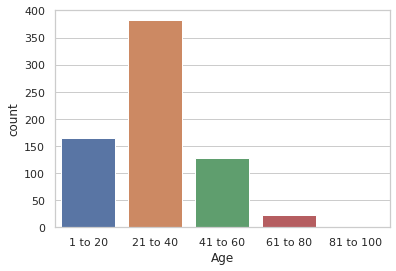

In [20]:
print(df['Age'].value_counts())
sns.countplot(x='Age', data=df) # visulalise the distribution of target column 
plt.show()

**Processing categorical data**

In [21]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [22]:
one_hot_enco = pd.get_dummies(df['Age'], prefix='Age')
df1=df.join(one_hot_enco)
df=df1.drop(['Age'], axis = 1)

In [23]:
one_hot_enco = pd.get_dummies(df['Fare'], prefix='Fare')
df1=df.join(one_hot_enco)
df=df1.drop(['Fare'], axis = 1)

In [24]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [25]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

### Logistic Regression Model Fitting

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 22)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

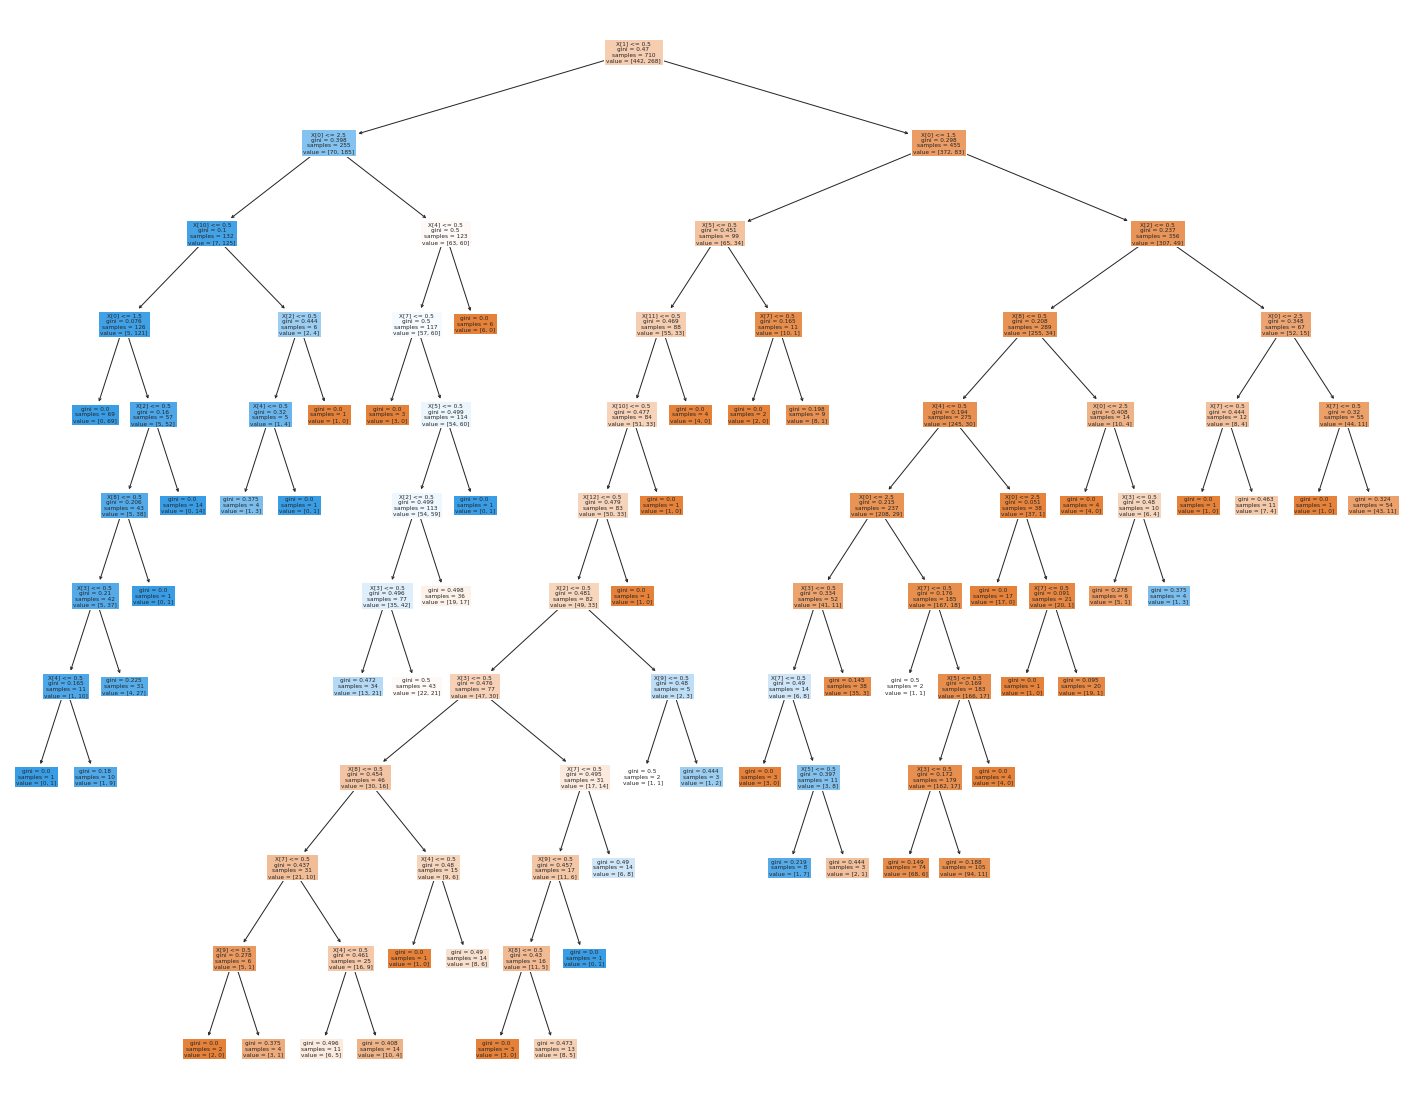

In [29]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   #feature_names=iris.feature_names,  
                   #class_names=iris.target_names,
                   filled=True)


In [30]:
y_pred = model.predict(X_test)

In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


### Cross Validation

In [32]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
model = tree.DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 0.79


### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102   5]
 [ 25  46]]


The result is telling us that we have **102+46** correct predictions and **25+46** incorrect prediction

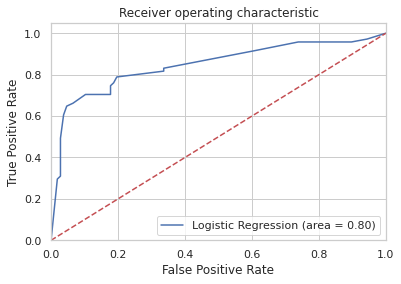

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Project Details

This repo contain machine learning projects

## 1. Multiple Linear Regression Model
Using Multiple Linear Regression model to predict the consumption of fuel by a car.

The data set was downloaded from this website :- https://vincentarelbundock.github.io/Rdatasets/datasets.html

This project was done to implement my learnings about the machine learning algorithms.

![output](https://user-images.githubusercontent.com/90661230/150852731-bbd62fbb-3219-4ded-ba33-a41bac52d62e.png)


## 2. Logistic Regression

In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

![index](https://user-images.githubusercontent.com/90661230/152688077-0294ded5-65ee-4e7d-8f8b-ed354c65a605.png)

**Problem Statement**

In this project, I try to answer the question that whether or not an employee will quit a his/her job. I implement Logistic Regression with Python and Scikit-Learn.

To answer the question, I build a classifier to predict whether or not an employee will quit a his/her job by training a binary classification model using Logistic Regression. I have used the Rain in Australia dataset downloaded from the Kaggle website for this project.

The Python implementation is presented in the Jupyter notebook

**Result**

The logistic regression model accuracy score is  0.84 and 10-fold cross validation average accuracy: 0.837. So, the model does a very good job in predicting whether or not  an employee will quit a his/her job  The model shows no signs of overfitting.


## 3. Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too \The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).\In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

![index](https://previews.dropbox.com/p/thumb/ABeTnGGQa-_iyNiSApUYULs9L9VnwLb7ZEqWzk__QQLknwl5FAjeEMb4gDZeoRW8J71mEryTMn_EpwwPLBVuUlePpHUj95IpJKfDgENfSdu89_PIPSrD1Ls3IU6d7h4Tlx1WMFJYutWuTaggLI2gIFC7SlTzsuzwayuQUYgJEIlAYD7rhQL0NNdwXpsW-RZo_-dBN26RtmcolcJImL-iVGorlBkR-oy4In8Q87dKRLRMlOoFlI5BADQlw6xkthyMxtXsH6QBIoOHhsGKYeqwIXcgqQ-3JuLMA8qm1yEXtnDjwzksEp7MXs7q72eoXZ5A7L9yvF_2F-8XuQlOBCWcq2BFC6gNPvDhoX1ykKzLPSLGLg/p.png)

**Problem Statement**

In this projecct, The popular Titanic dataset is used(Available on kagel). I try to classify weather or not a passager will survive the the crash./n  To do this, the Decision Tree Classifier was used.
The Python implementation is presented in the Jupyter notebook

**Result**

The Decision tree model accuracy score is  0.83 and 10-fold cross validation average accuracy: 0.79. A 0.04 diffrence, So, the model does a very good job in predicting whether or not a passenger will survive or not.